In [1]:
# Task 1: Student Score Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [4]:
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)


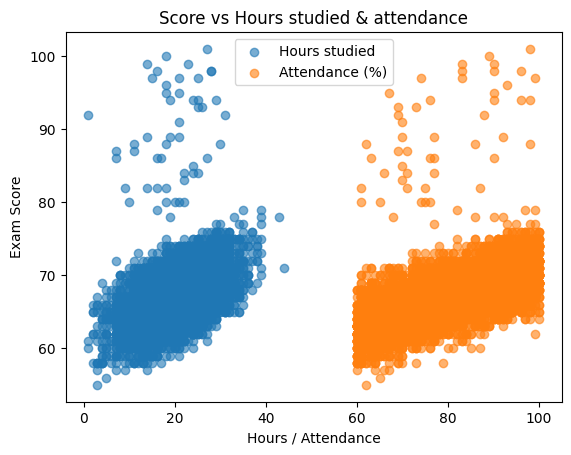

In [8]:

plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.6, label="Hours studied")
plt.scatter(df["Attendance"], df["Exam_Score"], alpha=0.6, label="Attendance (%)")
plt.legend()
plt.xlabel("Hours / Attendance")
plt.ylabel("Exam Score")
plt.title("Score vs Hours studied & attendance")
plt.show()


In [9]:
X = df[["Hours_Studied", "Attendance"]]
y = df["Exam_Score"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [13]:
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

MAE: 1.47, MSE: 5.81, R²: 0.59


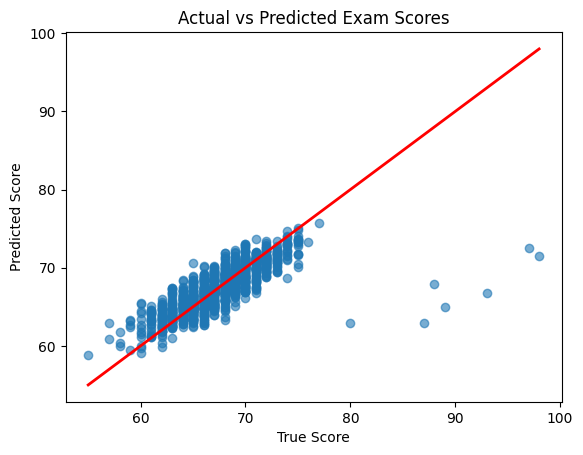

In [14]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("True Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()